# Feature Engineering

In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt

### Definition

![](img_fe.JPG)

In [2]:
from _linear_regression_util import compute_cost, compute_gradient, gradient_descent

iteration: 0 :: w0 = 18.145, b = [1.245]
iteration: 100 :: w0 = 15.640529252177169, b = [-12.4215267]
iteration: 200 :: w0 = 16.430320968622194, b = [-22.6665682]
iteration: 300 :: w0 = 17.034437320645782, b = [-30.50306099]
iteration: 400 :: w0 = 17.49652948897721, b = [-36.49724065]
iteration: 500 :: w0 = 17.849986519759423, b = [-41.0822241]
iteration: 600 :: w0 = 18.12034789173528, b = [-44.58930504]
iteration: 700 :: w0 = 18.327148903147904, b = [-47.27189198]
iteration: 800 :: w0 = 18.48533221908811, b = [-49.32381859]
iteration: 900 :: w0 = 18.606327572403444, b = [-50.89334938]
w0 final = 18.69806953562155, b final = [-52.08341025]


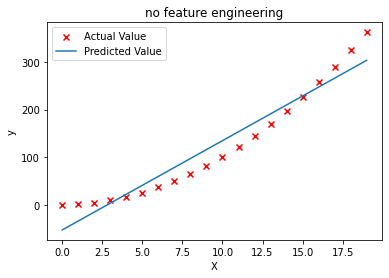

In [3]:
# create target data

x = np.arange(0, 20, 1)
y = 1 + x**2
X = x.reshape(-1, 1)  #X should be a 2-D Matrix

w = np.array(0)
b = 0
alpha = 1e-2
iterations = 1000

model_w,model_b,J_hist,w0_hist,b_hist = gradient_descent(X, y, w, b, compute_cost, compute_gradient, alpha, iterations)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); 
plt.title("no feature engineering")

plt.plot(x, np.dot(X,model_w) + model_b, label="Predicted Value");  
plt.xlabel("X"); 
plt.ylabel("y"); 
plt.legend(); plt.show()

### observations

 - linear regression model prediction does not fits the data well

iteration: 0 :: w0 = 0.28256800000000004, b = [0.001245]
iteration: 1000 :: w0 = 1.0043505470772724, b = [0.0089615]
iteration: 2000 :: w0 = 1.0043306736277076, b = [0.0134886]
iteration: 3000 :: w0 = 1.004310890960748, b = [0.01799502]
iteration: 4000 :: w0 = 1.0042911986616954, b = [0.02248085]
iteration: 5000 :: w0 = 1.0042715963177462, b = [0.02694619]
iteration: 6000 :: w0 = 1.0042520835179825, b = [0.03139114]
iteration: 7000 :: w0 = 1.0042326598533629, b = [0.03581578]
iteration: 8000 :: w0 = 1.0042133249167153, b = [0.0402202]
iteration: 9000 :: w0 = 1.0041940783027274, b = [0.04460451]
w0 final = 1.0041749387228514, b final = [0.04896444]


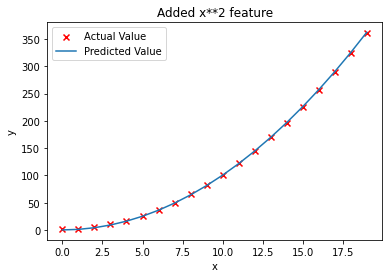

In [4]:
# adding new feature (feature engineering)

# create target data
x = np.arange(0, 20, 1)
y = 1 + x**2

# Engineer features 
X = x**2 
X = X.reshape(-1, 1)  #X should be a 2-D Matrix

w = np.array(0)
b = 0
alpha = 1e-5
iterations = 10000

model_w,model_b,J_hist,w0_hist,b_hist = gradient_descent(X, y, w, b, compute_cost, compute_gradient, alpha, iterations)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); 
plt.title("Added x**2 feature")

plt.plot(x, np.dot(X,model_w) + model_b, label="Predicted Value"); 
plt.xlabel("x"); 
plt.ylabel("y"); plt.legend(); plt.show()